In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

labels = pd.Series({
    1: True,
    2: False,
    3: True,
    4: False,
    5: False,
    6: True,
    7: False,
    8: True,
    9: True,
    10: False,
    11: True,
    12: False,
    13: False,
    14: True,
    15: True,
    16: False
})

idx = list(range(1,17))

In [147]:
df = pd.read_csv('/home/manu/Downloads/Thesis - Form Responses - Form responses 1.csv')

df = df.iloc[:, [0]+[4,5,6,7,8]+list(range(14,len(df.columns)-12))]
df = df.replace(to_replace=['Strongly Agree', 'Agree', 'Undecided', 'Disagree', 'Strongly Disagree'], value=[5,4,3,2,1])
df = df.replace(to_replace=['Human', 'Computer'], value=[True, False])
df = df.replace(to_replace=[
    'I am a music lover and sometimes listen to jazz music',
    'I am not very familiar with jazz music',
    'I am a musician and/or a jazz enthusiast'
], value=['low', 'middle', 'high'])


rename_cols = {
    'Timestamp': 'timestamp',
    'What is your nationality?.1': 'nationality',
    'What is your age?.1': 'age',
    'What is your relationship with jazz music?.1': 'acquaintance',
    'Does the music in the clip above sound good overall?': 'q1',
    'Does the music in the clip above sound novel and interesting?': 'n1',
    'Do you think that the music in the clip above music has been improvised by a human or a computer?': 'h1'
}

for i in range(1, 16):
    rename_cols[f'Does the music in the clip above sound good overall?.{i}'] =  f'q{i+1}'
    rename_cols[f'Does the music in the clip above sound novel and interesting?.{i}'] = f'n{i+1}'
    rename_cols[f'Do you think that the music in the clip above music has been improvised by a human or a computer?.{i}'] = f'h{i+1}'

df = df.rename(columns=rename_cols)

In [148]:
df

,timestamp,nationality,age,acquaintance,q1,n1,h1,q2,n2,h2,...,h13,q14,n14,h14,q15,n15,h15,q16,n16,h16
0,26/06/2022 15:58:52,Philippines,15 - 30 years old,low,5,5,True,4,4,False,...,False,5.0,5.0,True,1.0,1.0,False,2.0,3.0,False
1,26/06/2022 16:02:47,Taiwan,15 - 30 years old,middle,4,5,False,4,4,False,...,True,5.0,5.0,True,5.0,4.0,False,4.0,5.0,False
2,26/06/2022 16:16:45,Italy,15 - 30 years old,middle,3,3,False,4,2,False,...,False,3.0,4.0,False,4.0,3.0,False,4.0,4.0,True
3,26/06/2022 16:17:45,Italy,15 - 30 years old,middle,3,4,False,4,2,True,...,False,5.0,5.0,True,4.0,3.0,False,2.0,3.0,False
4,26/06/2022 16:17:47,Italy,15 - 30 years old,low,4,2,False,5,3,True,...,False,5.0,5.0,True,3.0,3.0,False,4.0,3.0,False
5,26/06/2022 16:27:27,Italy,15 - 30 years old,low,2,1,False,3,2,True,...,True,4.0,4.0,True,2.0,2.0,False,2.0,2.0,False
6,26/06/2022 16:36:15,Taiwan,15 - 30 years old,low,3,2,False,4,4,True,...,False,4.0,4.0,False,3.0,2.0,False,4.0,2.0,True
7,26/06/2022 16:45:34,Italy,15 - 30 years old,middle,2,2,False,5,5,True,...,False,4.0,4.0,True,4.0,4.0,True,1.0,2.0,False
8,26/06/2022 16:49:37,Italy,30 - 45 years old,low,4,2,False,4,4,True,...,False,3.0,3.0,False,4.0,3.0,False,5.0,5.0,True
9,26/06/2022 17:32:45,Taiwan,15 - 30 years old,middle,4,4,True,4,4,True,...,True,4.0,2.0,False,5.0,2.0,True,4.0,2.0,False


/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'level of acquaintance with jazz'),
 Text(0, 0.5, 'n. of respondents')]

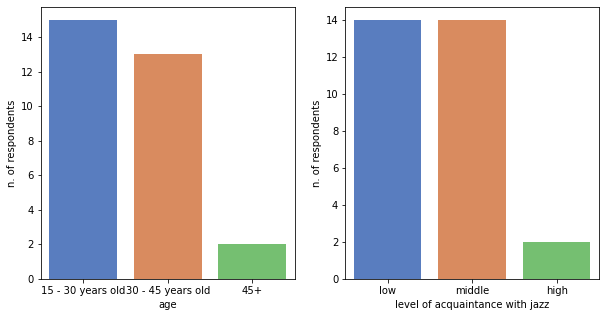

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

rcParams['figure.figsize'] = 15,10
sns.countplot(df.age, ax=ax1, palette="muted")
ax1.set(xlabel='age', ylabel='n. of respondents')

sns.countplot(df.acquaintance, ax=ax2, palette="muted")
ax2.set(xlabel='level of acquaintance with jazz', ylabel='n. of respondents')

# rcParams['figure.figsize'] = 16,8

/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


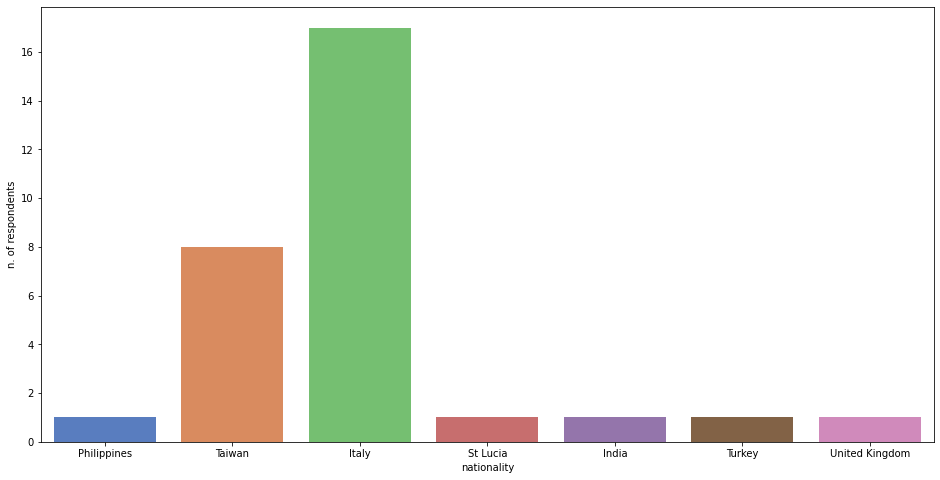

In [150]:
rcParams['figure.figsize'] = 16,8

ax = sns.countplot(df.nationality, palette="muted")
ax.set(xlabel='nationality', ylabel='n. of respondents')

rcParams['figure.figsize'] = 16,8

/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


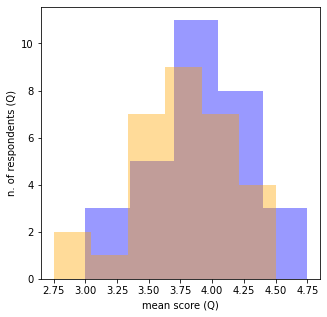

In [331]:
q_voting = df.filter(regex=("q[0-9]+"))
tot_q_voting = q_voting.mean(axis=1)
h_q_voting = q_voting.iloc[:, labels.values].mean(axis=1)
c_q_voting = q_voting.iloc[:, ~labels.values].mean(axis=1)

# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
rcParams['figure.figsize'] = 5,5

ax1 = sns.distplot(x=h_q_voting, kde=False, label='Corpus', color='blue')
ax1 = sns.distplot(x=c_q_voting, kde=False, label='CoolCatAI-D', color='orange')
ax1.set(xlabel='mean score (Q)', ylabel='n. of respondents (Q)')
ax1.legend().remove()

/home/manu/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


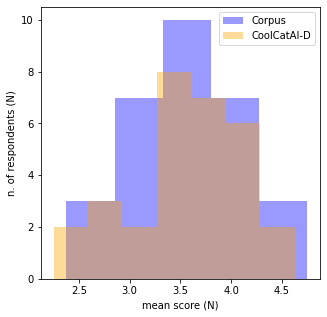

In [330]:
n_voting = df.filter(regex=("n[0-9]+"))
tot_n_voting = n_voting.mean(axis=1)
h_n_voting = n_voting.iloc[:, labels.values].mean(axis=1)
c_n_voting = n_voting.iloc[:, ~labels.values].mean(axis=1)

rcParams['figure.figsize'] = 5,5
ax2 = sns.distplot(x=h_n_voting, kde=False, label='Corpus', color='blue')
ax2 = sns.distplot(x=c_n_voting, kde=False, label='CoolCatAI-D', color='orange')
ax2.set(xlabel='mean score (N)', ylabel='n. of respondents (N)')
ax2.legend()

In [217]:
length = df.shape[0]

vq = pd.concat([
    pd.concat([h_q_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)),
               df['acquaintance']],axis=1),
    
    pd.concat([c_q_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)), 
               df['acquaintance']],axis=1),
    
    pd.concat([h_q_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)),
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1),
    
    pd.concat([c_q_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)), 
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1),
], axis=0).reset_index(drop=True).rename({'acquaintance': 'acquaintance with jazz'},axis=1)

vn = pd.concat([
    pd.concat([h_n_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)), 
               df['acquaintance']],axis=1),
    
    pd.concat([c_n_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)), 
               df['acquaintance']],axis=1),
    
    pd.concat([h_n_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)), 
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1),
    pd.concat([c_n_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)), 
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1)
], axis=0).reset_index(drop=True).rename({'acquaintance': 'acquaintance with jazz'},axis=1)

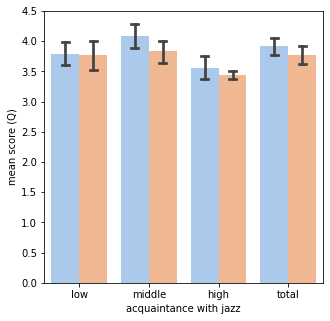

In [334]:
# fig, (ax1, ax3) = plt.subplots(ncols=2, sharex='col', sharey=True, constrained_layout=True)

rcParams['figure.figsize'] = 5,5

ax1 = sns.barplot(data=vq, x='acquaintance with jazz', y=0, hue=1, palette='pastel', capsize=0.1)
ax1.set(xlabel='acquaintance with jazz', ylabel='mean score (Q)', ylim=(0,4.5))
ax1.get_legend().remove()


# tot = pd.concat([
#     pd.concat([qscores, pd.Series(index=range(1,17), data=np.repeat('Q', 16)), labels],axis=1),
#     pd.concat([nscores, pd.Series(index=range(1,17), data=np.repeat('N', 16)), labels],axis=1),
# ], axis=0).reset_index(drop=True)
# sns.violinplot(data=q, x=1, y=0, hue=2, ax=ax2, palette='pastel')

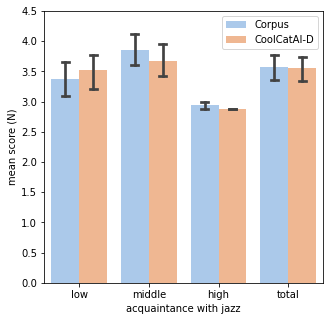

In [316]:
ax2 = sns.barplot(data=vn, x='acquaintance with jazz', y=0, hue=1, palette='pastel', capsize=0.1)
ax2.set(xlabel='acquaintance with jazz', ylabel='mean score (N)', ylim=(0,4.5))
ax2.legend(title='')

In [104]:
qscores = df.filter(regex=("q[0-9]+"))
# qscores

In [233]:
qscores = df.filter(regex=("q[0-9]+")).mean(axis=0)
qscores.index = idx
# sns.kdeplot(x=qscores, hue=labels)
# plt.axvline(x=qscores[labels].mean(), color='orange')
# plt.axvline(x=qscores[~labels].mean(), color='blue')

In [232]:
nscores = df.filter(regex=("n[0-9]+")).mean(axis=0)
nscores.index = idx
# sns.kdeplot(x=nscores, hue=labels)
# plt.axvline(x=nscores[labels].mean(), color='orange')
# plt.axvline(x=nscores[~labels].mean(), color='blue')

In [63]:
nscores

1     3.172414
2     3.586207
3     3.965517
4     3.586207
5     3.620690
6     3.821429
7     3.862069
8     3.250000
9     3.481481
10    3.333333
11    3.555556
12    3.148148
13    3.615385
14    4.038462
15    3.111111
16    3.407407
dtype: float64

In [51]:
hvoting = df.filter(regex=("h[0-9]+")).mean(axis=1)
# sns.kdeplot(x=hvoting[df['acquaintance'] =='low'])
# sns.kdeplot(x=hvoting[df['acquaintance'] =='middle'])
# sns.kdeplot(x=hvoting[df['acquaintance'] =='high'])
# sns.histplot(x=hvoting, hue=df['acquaintance'], stat='count')

# plt.axvline(x=hvoting[df['acquaintance'] == 'low'].mean(), color='blue')
# plt.axvline(x=hvoting[df['acquaintance'] == 'middle'].mean(), color='orange')
# plt.axvline(x=hvoting[df['acquaintance'] == 'high'].mean(), color='green')

In [182]:
correct = df.filter(regex=("h[0-9]+")).apply(lambda x: x.values == labels.values, axis=1).apply(sum)
correct = pd.concat([correct, df['acquaintance']], axis=1)

<AxesSubplot:xlabel='acquaintance', ylabel='0'>

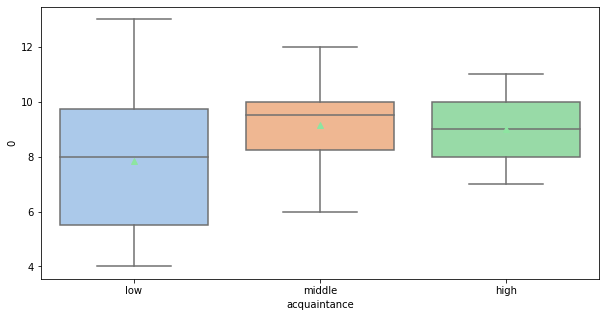

In [189]:
sns.boxplot(data=correct, x='acquaintance', y=0, showmeans=True)

In [231]:
# novel = df.filter(regex='n[0-9]+', axis=1)

# sns.boxplot(data=novel)

In [230]:
# hscores = df.filter(regex=("h[0-9]+")).mean(axis=0).reset_index(drop=True)

# h = pd.concat([hscores, 
#                pd.Series(index=range(hscores.shape[0]),data=np.repeat('h', hscores.shape[0])), 
#                labels.reset_index(drop=True)], axis=1)
# sns.catplot(data=h, x=1, y=0, hue=2, kind="violin", palette='pastel')

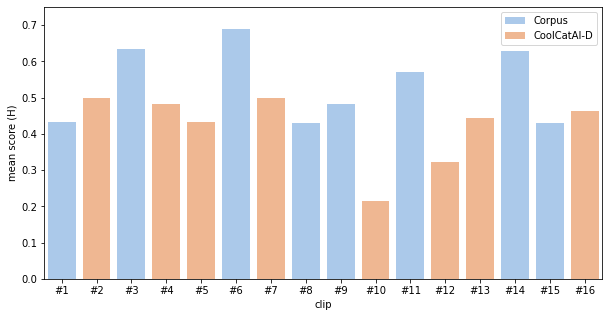

In [306]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex='col', sharey=True, constrained_layout=True, gridspec_kw={'width_ratios': [1.5, 1]})

t = df.filter(regex='h[0-9]+', axis=1).mean().reset_index(drop=True)

clrs = ['orange' if l else 'orange' for l in labels]

rcParams['figure.figsize'] = 10,5

ax1 = sns.barplot(x=t.index, y=t.values, dodge=False, hue=labels.apply(lambda l: 'Corpus' if l else 'CoolCatAI-D').values)
rcParams['figure.figsize'] = 10,5
ax1.set(xticklabels=[f'#{i}' for i in range(1,17)], xlabel='clip', ylabel='mean score (H)', ylim=(0,0.75))
ax1.legend()

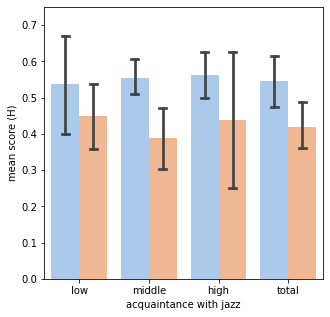

In [298]:
h_voting = df.filter(regex=("h[0-9]+"))
tot_h_voting = h_voting.mean(axis=1)
h_h_voting = h_voting.iloc[:, labels.values].mean(axis=1)
c_h_voting = h_voting.iloc[:, ~labels.values].mean(axis=1)

vh = pd.concat([
    pd.concat([h_h_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)),
               df['acquaintance']],axis=1),
    pd.concat([c_h_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)), 
               df['acquaintance']],axis=1),
    
    pd.concat([h_h_voting, 
               pd.Series(index=range(length), data=np.repeat('Corpus', length)), 
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1),
    pd.concat([c_h_voting, 
               pd.Series(index=range(length), data=np.repeat('CoolCatAI-D', length)),
               pd.Series(index=range(length), data=np.repeat('total', length), name='acquaintance')],axis=1), 
])

rcParams['figure.figsize'] = 5,5

ax2 = sns.barplot(data=vh, x='acquaintance', y=0, hue=1, palette='pastel', capsize=0.1)
ax2.set(xlabel='acquaintance with jazz', ylabel='mean score (H)', ylim=(0,0.75))
ax2.legend().remove()

In [266]:
qqqq = df.filter(regex=("q[0-9]+")).mean(axis=0).values
nnnn = df.filter(regex=("n[0-9]+")).mean(axis=0).values

np.corrcoef(qq, nn)

array([[1.        , 0.77237419],
       [0.77237419, 1.        ]])